In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from seminartools.models.utils import get_mse_by_country
from seminartools.data import read_merged
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.mucsvss_model import MUCSVSSModel
from seminartools.models.pca_var_model import PCAVARModel


muc_model = MUCSVSSModel(num_particles=100008, stochastic_seasonality=True)
muc_model.load_from_disk("../../models/mucsvss_model_100008_deterministic_all.pkl")
muc_model

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [3]:
df = read_merged().reset_index()


In [4]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

# Try multistep ahead UCSVSS model

In [46]:
UCSV = UCSVSSModel(num_particles = 10000, stochastic_seasonality=False)
UCSV.full_fit(df)
UCSV

  0%|          | 0/20 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
100%|██████████| 20/20 [05:43<00:00, 17.16s/it]


In [47]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(UCSV, df, "2010-01-01", h=1)
forecast

,inflation,country,date
0,0.000057,Japan,2010-01-01
1,0.004695,Canada,2010-01-01
2,0.006775,United States,2010-01-01
3,0.006854,Australia,2010-01-01
4,0.006583,New Zealand,2010-01-01
...,...,...,...
1055,0.006808,Norway,2023-01-01
1056,0.029823,Belgium,2023-01-01
1057,0.006975,Korea,2023-01-01
1058,0.012707,South Africa,2023-01-01


In [59]:
from seminartools.models.utils import make_oos_predictions

forecast = make_oos_predictions(lambda: UCSVSSModel(num_particles = 1000, stochastic_seasonality=False), df,tss,h=4)
forecast

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x12c648080>)


100%|██████████| 20/20 [00:38<00:00,  1.92s/it]


Fitted!


,inflation,country,date
0,0.001373,Japan,2000-01-01
1,0.002628,Canada,2000-01-01
2,0.003859,United States,2000-01-01
3,0.000464,Australia,2000-01-01
4,-0.002536,New Zealand,2000-01-01
...,...,...,...
1821,0.006270,Norway,2023-01-01
1822,0.026322,Belgium,2023-01-01
1823,0.004649,Korea,2023-01-01
1824,0.012796,South Africa,2023-01-01


/Users/matthy/Desktop/IBEOR/third_year/seminar_forecasting/Bayesian/seminar-1/seminartools/models/armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast += exog_coefs[j] * exogData[i-1]
/Users/matthy/Desktop/IBEOR/third_year/seminar_forecasting/Bayesian/seminar-1/seminartools/models/armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast += exog_coefs[j] * exogData[i-1]
/Users/matthy/Desktop/IBEOR/third_year/seminar_forecasting/Bayesian/seminar-1/seminartools/models/armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.004,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.004,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
5652,Norway,2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5653,Belgium,2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5654,Korea,2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5655,South Africa,2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


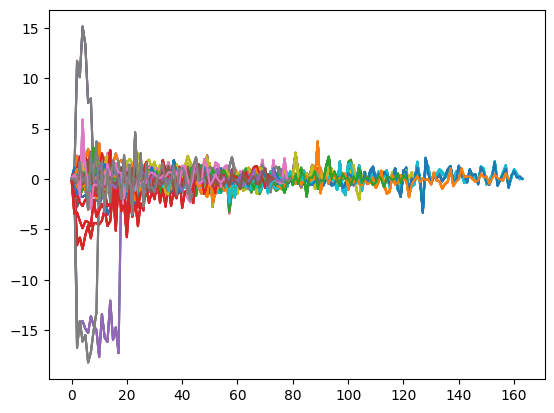

In [23]:
from seminartools.models.utils import make_oos_predictions

exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]
forecast = make_oos_predictions(lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns), df,tss,h=4)
forecast

In [24]:
f = forecast['inflation']
f


0       0.022951
1       0.023904
2       0.017231
3       0.027244
4       0.023346
          ...   
5652         NaN
5653         NaN
5654         NaN
5655         NaN
5656         NaN
Name: inflation, Length: 5657, dtype: float64

# 1. Get stats for four steps ahead forecast

In [14]:
from seminartools.models.utils import get_stats
exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats = get_stats(
    [
     #  ("4qa", lambda: FourQuarterAverageModel()),
     # ("pca_var", lambda: PCAVARModel()),
     # ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
     #  (
      #      "arx",
    #        lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
     #   ),
     #  ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
    #    (
     #        "armax",
    #        lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
    #   ),
    #   (
    #         "uc_sv",
     #       lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
     #    ),
     #  (
     ##       "uc_sv_ss",
    #         lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
     #   ),
        # ("random_effects", lambda: RandomEffectsModel()),
       #  (
       #    "random_effects_x",
       #      lambda: RandomEffectsModel(exogenous_columns=exog_columns),
       #  ),
       #  ("distance", lambda: DistanceModel()),
       #  ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
       #  ("mucsvss", lambda: muc_model),
       
    ],
    df,
    tss,
    h = 4,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic,p-value
arma,0.000057,0.005343,0.231538,0.00087,0.824839,0.243431,11.380721,1.2469821541253844e-05


In [63]:
# format r2 column to 2 
format_stats = stats.copy()
format_stats['p-value'] =format_stats['p-value'].astype(float)
round_cols = ["r2", "mz_intercept", "mz_slope", "mz_r2", "mz_wald_test_statistic", "p-value"]
for col in round_cols:
    format_stats[col] = format_stats[col].apply(lambda x: round(x, 3))

format_stats['mz_wald_test_statistic'] = format_stats['mz_wald_test_statistic'].astype(str) + '(' + format_stats['p-value'].astype(str) + ')'
format_stats.drop(columns = ['p-value'], inplace = True)

# get relative to UCSV
format_stats.loc[:,["mse","mae"]] = format_stats.loc[:,["mse","mae"]].div(format_stats.loc["uc_sv",["mse","mae"]])
format_stats

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic
4qa,0.970969,0.990584,0.209,0.002,0.738,0.244,39.044(0.0)
uc_sv,1.0,1.0,0.180,0.001,0.858,0.191,11.895(0.0)
uc_sv_ss,1.388661,1.229083,-0.139,0.004,0.346,0.051,175.237(0.0)


In [ ]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    format_stats.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023",
        label="tab:model_eval",
        float_format="%.4f",
    )
)